   # What Make Us Smile: World Happiness Data at a Glance

What is the factor that most influence the level of happiness?

  - **Hypothesis**: GDP is positively related to happiness level.
  
  - **Nullhypothesis**: GDP is not related to the happiness level.

*Bakground: The happiness score ranking use data from theGallup World Poll. The scores are based on answers to different factors including GDP, freedom,family, social support and others. There are over 150 countries in this dataset, ranging from 2015 to 2020. For our analysis, we only include 2018-2020 since these three years have similar traits.*

source: https://www.kaggle.com/mathurinache/world-happiness-report?select=2015.csv

### 1. Cleaning process

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import csv

In [2]:
#The path to the CSV file
file_2018 = "Resources/2018.csv"
file_2019 = "Resources/2019.csv"
file_2020 = "Resources/2020.csv"

In [3]:
# Read the files
df_2018 = pd.read_csv(file_2018)
df_2019 = pd.read_csv(file_2019)
df_2020 = pd.read_csv(file_2020)

In [4]:
# visualizate the data

df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
# Rename ladder score column 
clean_df_2020 = df_2020.rename(columns={"Ladder score":"Happiness Score", "Logged GDP per capita":"GDP per capita"})

# Drop unnecesary columns
clean_df_2020 = clean_df_2020[["Country name", "Regional indicator", "Happiness Score", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity"]]

In [6]:
clean_df_2020

,Country name,Regional indicator,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533
...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519


In [7]:
# Narrow down the range of countries (Western Europe vs Latin America and Caribbean)

region_df_2020 = clean_df_2020.loc[(clean_df_2020["Regional indicator"]=="Western Europe")|(clean_df_2020["Regional indicator"]=="Latin America and Caribbean")|(clean_df_2020["Regional indicator"]=="Middle East and North Africa")
                |(clean_df_2020["Regional indicator"]=="Central and Eastern Europe")|(clean_df_2020["Regional indicator"]=="North America and ANZ")]

# Reset the index
region_df_2020 = region_df_2020.reset_index(drop=True)

In [8]:
# Western Europe df
we_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="Western Europe")]

In [9]:
# Latin American and Caribbean
lac_df = clean_df_2020.loc[(clean_df_2020["Regional indicator"]=="Latin America and Caribbean")]

In [10]:
# Middle East and North Africa
mena_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="Middle East and North Africa")]

In [11]:
# Central and Eastern Europe
cee_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="Central and Eastern Europe")]

In [12]:
# North America and ANZ
na_df = region_df_2020.loc[(region_df_2020["Regional indicator"]=="North America and ANZ")]

In [13]:
# Look for null values
region_df_2020.count()

Country name                    80
Regional indicator              80
Happiness Score                 80
GDP per capita                  80
Social support                  80
Healthy life expectancy         80
Freedom to make life choices    80
Generosity                      80
dtype: int64

### 2. Data visualization

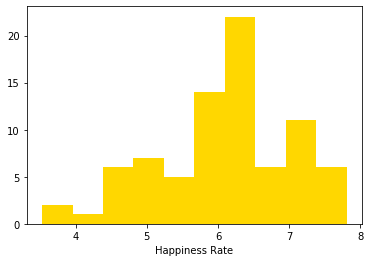

In [14]:
#Distribution of the data

happiness_rate = region_df_2020["Happiness Score"]
plt.hist(happiness_rate, color="gold")
plt.xlabel('Happiness Rate')
plt.show()

In [15]:
# Describe the data
region_df_2020.describe()

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,6.101023,9.967232,0.866472,68.609640,0.802436,-0.040215
std,0.942664,0.801378,0.077730,3.900124,0.116720,0.145376
min,3.527400,7.411329,0.592628,55.598625,0.466611,-0.300907
25%,5.543450,9.456189,0.824956,66.791725,0.743382,-0.158610
50%,6.174850,10.118502,0.885515,68.399750,0.835462,-0.077146
75%,6.808975,10.588201,0.922573,72.300821,0.887424,0.085814
max,7.808700,11.450681,0.974670,74.402710,0.955750,0.400535


### 1.1 Do the countries of the same region have the same level of happiness?

In [16]:
# Create the variables for the plot

# WE Region
rate_we = we_df["Happiness Score"].values
country_name_we = we_df["Country name"].values
# LAC Region
rate_lac = lac_df["Happiness Score"].values
country_name_lac = lac_df["Country name"].values
# MENA Region
rate_mena = mena_df["Happiness Score"].values
country_name_mena = mena_df["Country name"].values
# CEE Region
rate_cee = cee_df["Happiness Score"].values
country_name_cee = cee_df["Country name"].values
# NA REGION
rate_na = na_df["Happiness Score"].values
country_name_na = na_df["Country name"].values

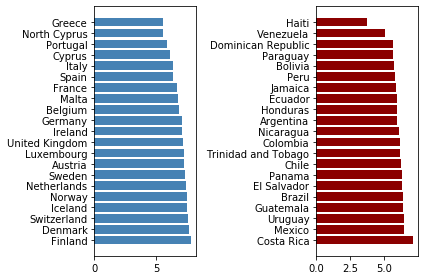

In [17]:
plt.subplot(1, 2, 1)
happiness_we = plt.barh(country_name_we,rate_we ,color="steelblue", linewidth=1)
plt.subplot(1, 2, 2)
happiness_lac = plt.barh(country_name_lac,rate_lac ,color="darkred", linewidth=1)
plt.tight_layout()


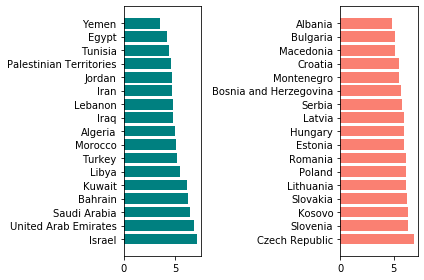

In [18]:
plt.subplot(1, 2, 1)
happiness_mena = plt.barh(country_name_mena,rate_mena ,color="teal", linewidth=1)
plt.subplot(1, 2, 2)
happiness_cee = plt.barh(country_name_cee,rate_cee ,color="salmon", linewidth=1)
plt.tight_layout()

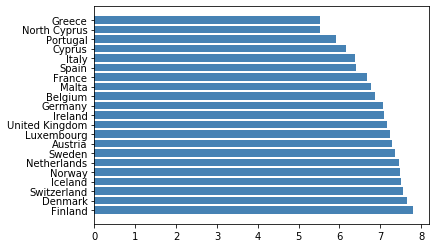

In [19]:
happiness_we = plt.barh(country_name_we,rate_we ,color="steelblue", linewidth=5)

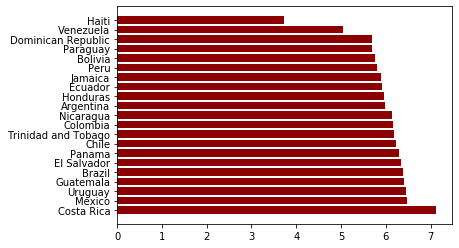

In [20]:
happiness_lac = plt.barh(country_name_lac,rate_lac ,color="darkred", linewidth=1)

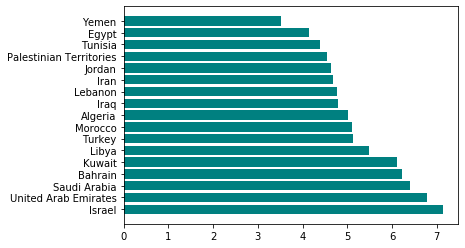

In [21]:
happiness_mena = plt.barh(country_name_mena,rate_mena ,color="teal", linewidth=1)

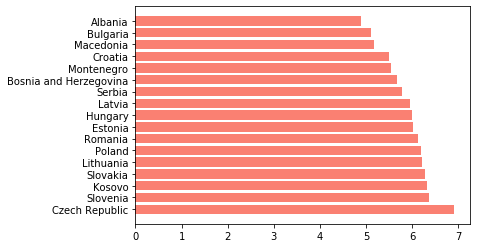

In [22]:
happiness_cee = plt.barh(country_name_cee,rate_cee ,color="salmon", linewidth=1)

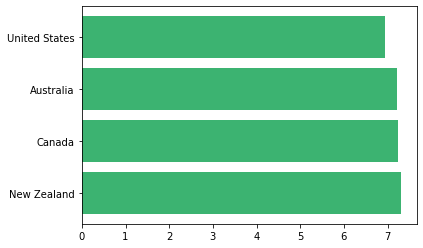

In [23]:
happiness_na = plt.barh(country_name_na,rate_na ,color="mediumseagreen", linewidth=1)

### 1.2 Do the variables have the same impact on the happiest countries?

In [24]:
# Correlation for Latin American and Caribbean data frame

corr_lac =lac_df.corr(method="pearson", min_periods=21)
corr_lac.style.background_gradient(cmap='coolwarm')

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Happiness Score,1.000000,0.659859,0.686113,0.785693,0.817212,-0.628030
GDP per capita,0.659859,1.000000,0.793414,0.655924,0.480838,-0.696882
Social support,0.686113,0.793414,1.000000,0.759718,0.575107,-0.738101
Healthy life expectancy,0.785693,0.655924,0.759718,1.000000,0.579839,-0.766815
Freedom to make life choices,0.817212,0.480838,0.575107,0.579839,1.000000,-0.485188
Generosity,-0.628030,-0.696882,-0.738101,-0.766815,-0.485188,1.000000


In [25]:
# Correlation for Western Europe

corr_we = we_df.corr()
corr_we.style.background_gradient(cmap='coolwarm')

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Happiness Score,1.000000,0.716912,0.856354,-0.282501,0.772881,0.620260
GDP per capita,0.716912,1.000000,0.564032,-0.113119,0.615023,0.492734
Social support,0.856354,0.564032,1.000000,-0.196009,0.713431,0.525462
Healthy life expectancy,-0.282501,-0.113119,-0.196009,1.000000,-0.256588,-0.094877
Freedom to make life choices,0.772881,0.615023,0.713431,-0.256588,1.000000,0.603077
Generosity,0.620260,0.492734,0.525462,-0.094877,0.603077,1.000000


In [26]:
# Correlation for Middle East and North Africa

corr_mena =lac_df.corr(method="pearson", min_periods=21)
corr_mena.style.background_gradient(cmap='coolwarm')

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Happiness Score,1.000000,0.659859,0.686113,0.785693,0.817212,-0.628030
GDP per capita,0.659859,1.000000,0.793414,0.655924,0.480838,-0.696882
Social support,0.686113,0.793414,1.000000,0.759718,0.575107,-0.738101
Healthy life expectancy,0.785693,0.655924,0.759718,1.000000,0.579839,-0.766815
Freedom to make life choices,0.817212,0.480838,0.575107,0.579839,1.000000,-0.485188
Generosity,-0.628030,-0.696882,-0.738101,-0.766815,-0.485188,1.000000


In [27]:
# Correlation for Central and Eastern Europe

corr_cee =lac_df.corr(method="pearson", min_periods=21)
corr_cee.style.background_gradient(cmap='coolwarm')

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Happiness Score,1.000000,0.659859,0.686113,0.785693,0.817212,-0.628030
GDP per capita,0.659859,1.000000,0.793414,0.655924,0.480838,-0.696882
Social support,0.686113,0.793414,1.000000,0.759718,0.575107,-0.738101
Healthy life expectancy,0.785693,0.655924,0.759718,1.000000,0.579839,-0.766815
Freedom to make life choices,0.817212,0.480838,0.575107,0.579839,1.000000,-0.485188
Generosity,-0.628030,-0.696882,-0.738101,-0.766815,-0.485188,1.000000


In [28]:
# Correlation for North America and ANZ
corr_na =na_df.corr(method="pearson", min_periods=4)
corr_na.style.background_gradient(cmap='coolwarm')

,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Happiness Score,1.000000,-0.928723,0.861139,0.958637,0.985085,0.369866
GDP per capita,-0.928723,1.000000,-0.853059,-0.784850,-0.889304,-0.460349
Social support,0.861139,-0.853059,1.000000,0.779405,0.761510,0.789991
Healthy life expectancy,0.958637,-0.784850,0.779405,1.000000,0.965643,0.255559
Freedom to make life choices,0.985085,-0.889304,0.761510,0.965643,1.000000,0.204832
Generosity,0.369866,-0.460349,0.789991,0.255559,0.204832,1.000000


### GDP Per Capita

#### **Independent T-test**

In [29]:
#Independent t-test - GPD
g1 = region_df_2020[region_df_2020['Regional indicator'] == 'Western Europe']["GDP per capita"]
g2 = region_df_2020[region_df_2020['Regional indicator'] == 'Latin America and Caribbean']["GDP per capita"]
stats.ttest_ind(g1,g2)

Ttest_indResult(statistic=8.607583083234514, pvalue=1.2098422060648664e-10)

In [30]:
#Independent t-test - GPD
g3 = region_df_2020[region_df_2020['Regional indicator'] == 'Central and Eastern Europe']["GDP per capita"]
g4 = region_df_2020[region_df_2020['Regional indicator'] == 'Middle East and North Africa']["GDP per capita"]
stats.ttest_ind(g3,g4)

Ttest_indResult(statistic=1.0712632140461713, pvalue=0.2920645407772715)

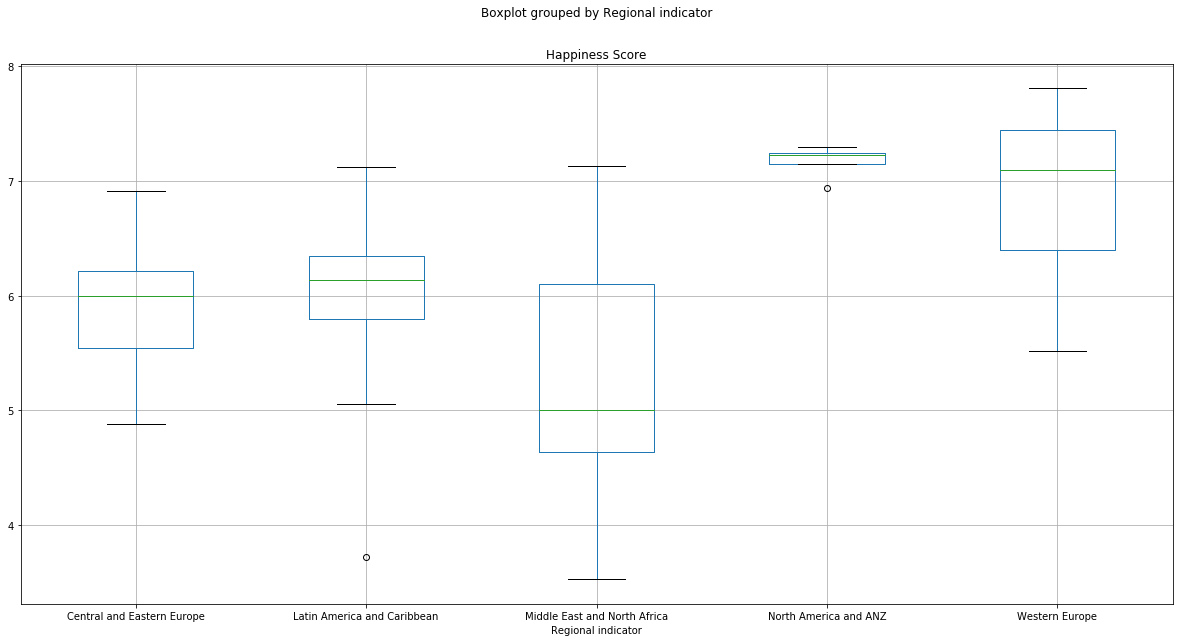

In [31]:
# Create a boxplot to compare means
region_df_2020.boxplot("Happiness Score", by="Regional indicator", figsize=(20, 10))

### ANOVA

In [32]:
# Extract individual groups - Happiness Score
group1 = region_df_2020[region_df_2020['Regional indicator'] == 'Western Europe']["Happiness Score"]
group2 = region_df_2020[region_df_2020['Regional indicator'] == 'Latin America and Caribbean']["Happiness Score"]
group3 = region_df_2020[region_df_2020['Regional indicator'] == 'Central and Eastern Europe']["Happiness Score"]
group4 = region_df_2020[region_df_2020['Regional indicator'] == 'Middle East and North Africa']["Happiness Score"]
group5 = region_df_2020[region_df_2020['Regional indicator'] == 'North America and ANZ']["Happiness Score"]

In [33]:
stats.f_oneway(group1, group2, group3,group4,group5)

F_onewayResult(statistic=15.763410271316431, pvalue=2.095752329095272e-09)

### Happines Score

### **Independent T-test**

In [34]:
#Independent t-test - Happiness
g1 = region_df_2020[region_df_2020['Regional indicator'] == 'Western Europe']["Happiness Score"]
g2 = region_df_2020[region_df_2020['Regional indicator'] == 'Latin America and Caribbean']["Happiness Score"]
stats.ttest_ind(g1,g2)

Ttest_indResult(statistic=4.4250908280324674, pvalue=7.23946909272924e-05)

In [35]:
#Independent t-test - Happiness
g3 = region_df_2020[region_df_2020['Regional indicator'] == 'Central and Eastern Europe']["Happiness Score"]
g4 = region_df_2020[region_df_2020['Regional indicator'] == 'Middle East and North Africa']["Happiness Score"]
stats.ttest_ind(g3,g4)

Ttest_indResult(statistic=2.4211513991962854, pvalue=0.021319260714313337)

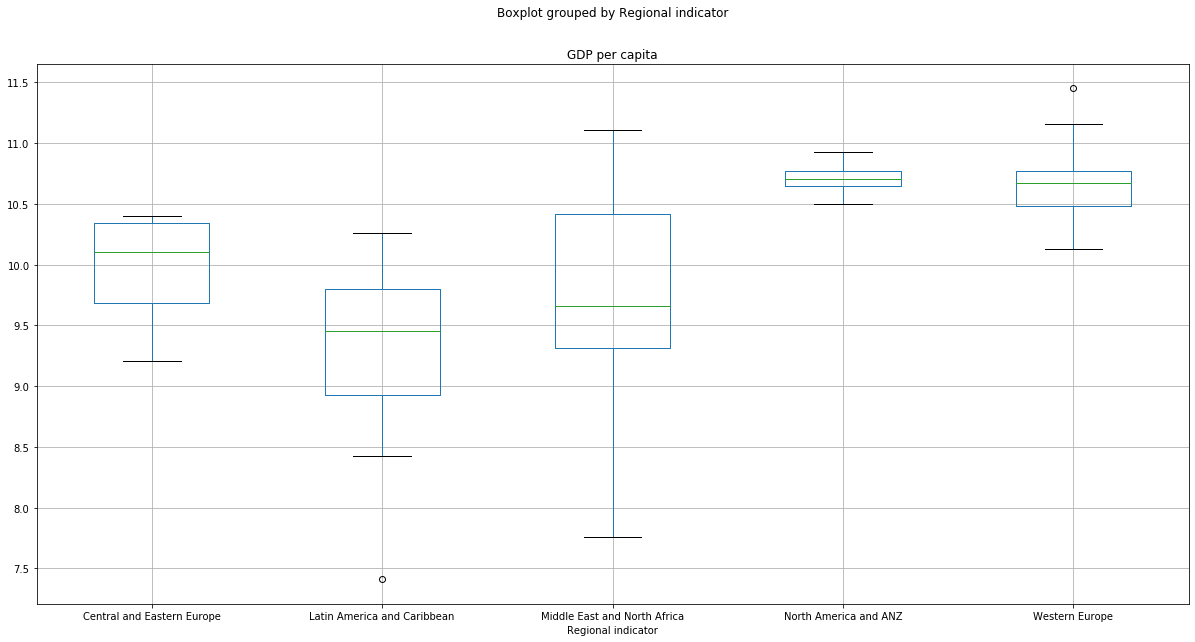

In [36]:
# Create a boxplot to compare means - GDP 
region_df_2020.boxplot("GDP per capita", by="Regional indicator", figsize=(20, 10))

### ANOVA

In [37]:
# Extract individual groups - GDP Score
group1 = region_df_2020[region_df_2020['Regional indicator'] == 'Western Europe']["GDP per capita"]
group2 = region_df_2020[region_df_2020['Regional indicator'] == 'Latin America and Caribbean']["GDP per capita"]
group3 = region_df_2020[region_df_2020['Regional indicator'] == 'Central and Eastern Europe']["GDP per capita"]
group4 = region_df_2020[region_df_2020['Regional indicator'] == 'Middle East and North Africa']["GDP per capita"]
group5 = region_df_2020[region_df_2020['Regional indicator'] == 'North America and ANZ']["GDP per capita"]

In [38]:
stats.f_oneway(group1, group2, group3,group4, group5)

F_onewayResult(statistic=16.162613217293092, pvalue=1.379088612056574e-09)

### Posthocs

In [39]:
#Dependencies
import statsmodels.api as sa
import statsmodels.formula.api as sfa
import scikit_posthocs as sp

In [42]:
region_df_2020.columns

Index(['Country name', 'Regional indicator', 'Happiness Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity'],
      dtype='object')

In [44]:
# Posthocs
region_df_2020.columns=['Country', 'Region', 'Happiness', 'GDP', 'SSupport',
       'Health', 'Freedom', 'Generosity']
lm = sfa.ols('Happiness ~ Region',data=region_df_2020).fit()
anova = sa.stats.anova_lm(lm)
print(anova)
sp.posthoc_ttest(region_df_2020, val_col='Happiness', group_col='Region', p_adjust='holm')

            df     sum_sq   mean_sq         F        PR(>F)
Region     4.0  32.062949  8.015737  15.76341  2.095752e-09
Residual  75.0  38.137705  0.508503       NaN           NaN


,Western Europe,North America and ANZ,Middle East and North Africa,Latin America and Caribbean,Central and Eastern Europe
Western Europe,1.000000,0.879772,0.000004,0.000579,0.000119
North America and ANZ,0.879772,1.000000,0.006432,0.008899,0.000892
Middle East and North Africa,0.000004,0.006432,1.000000,0.031610,0.063958
Latin America and Caribbean,0.000579,0.008899,0.031610,1.000000,0.879772
Central and Eastern Europe,0.000119,0.000892,0.063958,0.879772,1.000000


In [45]:
# What is the correlation level between the variables and the happiness rank?
def happiness(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values, y_values, c="royalblue", edgecolor="black")
    plt.plot(x_values, regress_values,"springgreen")
    plt.xlabel("Happiness Score")
    plt.ylabel(y_values.name)
    plt.show()
    print(line_eq)
    print(f"The r-value is: {rvalue}")

In [46]:
region_df_2020.columns

Index(['Country', 'Region', 'Happiness', 'GDP', 'SSupport', 'Health',
       'Freedom', 'Generosity'],
      dtype='object')

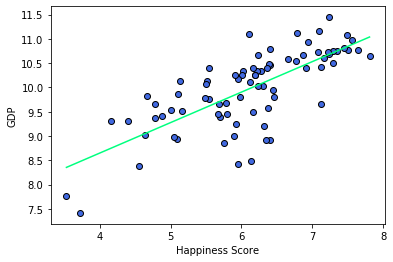

y =0.63x +6.14
The r-value is: 0.7370157041479967


In [47]:
happiness(region_df_2020["Happiness"], region_df_2020["GDP"])

### 3. Conclusions